**EC 414 - Spring 2019 - Prof. Kulis - HW 4 - Clustering (K-Means, DP-Means)**



Due Wed. March 27, 2019 - Before class starts.

**Problem 1:  K-Means**

Here you will apply K-Means on simple Gaussian data. You are given some code to guide you in implementing this clustering method.  Use of online code for K-Means is prohibited; use of the built-in scikitlearn function for K-Means is also prohibited. 
    

**(a)** Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,2]^T, \boldsymbol{\mu}_3 = [0,-2]^T$,

$\Sigma_1 = [[0.02,0];[0,0.02]]$, $\Sigma_2 = [[0.2,0];[0,0.2]]$, $\Sigma_3 = [[0.05,0];[0,0.05]]$ 

Let each cluster of data have $50$ points. Plot the generated Gaussian data.

(-3.191406621196183,
 2.5039030329699847,
 -2.6762269476405023,
 3.1372856890438716)

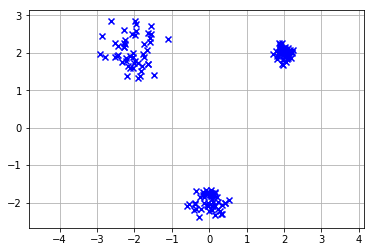

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_plot(x_axis, y_axis, x_label='', y_label='', color='b', marker='x', name='', title = ''):
    plt.scatter(x_axis, y_axis, c = color, marker = marker ,label = name, zorder = 3)
    plt.grid(zorder=0)
    if (title != ''):
        plt.title(title)
    if (x_label != ''):
        plt.xlabel(x_label)
    if (y_label != ''):
        plt.ylabel(y_label)

# Generate 2D Gaussian Data with 3 clusters of 3 different means
# Write code here:
mean_one = np.array([2,2])
mean_two = np.array([-2,2])
mean_three = np.array([0,-2])
covariance_one = np.array([[0.02,0],[0,0.02]])
covariance_two = np.array([[0.2,0],[0,0.2]])
covariance_three = np.array([[0.05,0],[0,0.05]])

one = np.random.multivariate_normal(mean_one, covariance_one, 50)
two = np.random.multivariate_normal(mean_two, covariance_two, 50)
three = np.random.multivariate_normal(mean_three, covariance_three, 50)

# Plotting
# Write code here:
scatter_plot([i[0] for i in one], [i[1] for i in one])
scatter_plot([i[0] for i in two], [i[1] for i in two])
scatter_plot([i[0] for i in three], [i[1] for i in three])
plt.axis('equal')

**(b)** Implement K-Means and apply it to the Gaussian data above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations).  

In [37]:
## K-Means implementation:

num_clusters = 3

### CODE 1 - Randomly initialize 3 means: ###
## Write code below here:
cluster_mean = np.zeros((num_clusters,2))
for i in range(3):
    cluster_mean[i] = 2*np.random.rand(1,2)
DATA = one + two + three
# cluster_mean
# ##############################################

# initializations
labels = np.ones((DATA.shape[0],1))
converged = 0
iteration = 0
convergence_threshold = 2
while (converged==0):
    iteration += 1
    print('Iteration: ',iteration)
    
    objective = 0
#     for i in range(DATA.shape[0]):
#         objective += (DATA[i][0] - cluster[])
    ### CODE 2 - Assignment Step - Assign each data observation to the cluster with the nearest mean: ###
    ## Write code below here:
    for i in range(DATA.shape[0]):
        distance = (DATA[i][0] - cluster_mean[0][0])**2*(DATA[i][1] - cluster_mean[0][1])**2
        cluster_id = 1
        for j in range(2):
            tmp_distance = (DATA[i][0] - cluster_mean[j+1][0])**2*(DATA[i][1] - cluster_mean[j+1][1])**2
            if (tmp_distance < distance):
                distance = tmp_distance
                cluster_id = j+1
        labels[i] = cluster_id
    
    ###################################################################
    
    
    ### CODE 3 - Mean Updating - Update the cluster means ###
    ## Write code below here:
    num = np.zeros((1,3))
    tmp_mean = np.zeros((3,2))
    for i in range(DATA.shape[0]):
        if (labels[i] == 1):
            num[0] += 1
            tmp_mean[0] += DATA[i]
        else if (labels[i] == 2):
            num[1] += 1
            tmp_mean[1] += DATA[i]
        else:
            num[2] += 1
            tmp_mean[2] += DATA[i]
    for i in range(3):
        tmp_mean[i] /= num[i]
    cluster_mean = tmp_mean
    
    ###########################################################
    
    ### CODE 4 - Check for convergence ###
    ## Write code below here:

    if ( ____ < convergence_threshold):
        converged=1
    
    #############################################################
    
    ### CODE 5 - Plot clustering results after each iteration: ###
    ## Write code below here:


    
    ###################################################################



Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Iteration:  67
Iter

Iteration:  574
Iteration:  575
Iteration:  576
Iteration:  577
Iteration:  578
Iteration:  579
Iteration:  580
Iteration:  581
Iteration:  582
Iteration:  583
Iteration:  584
Iteration:  585
Iteration:  586
Iteration:  587
Iteration:  588
Iteration:  589
Iteration:  590
Iteration:  591
Iteration:  592
Iteration:  593
Iteration:  594
Iteration:  595
Iteration:  596
Iteration:  597
Iteration:  598
Iteration:  599
Iteration:  600
Iteration:  601
Iteration:  602
Iteration:  603
Iteration:  604
Iteration:  605
Iteration:  606
Iteration:  607
Iteration:  608
Iteration:  609
Iteration:  610
Iteration:  611
Iteration:  612
Iteration:  613
Iteration:  614
Iteration:  615
Iteration:  616
Iteration:  617
Iteration:  618
Iteration:  619
Iteration:  620
Iteration:  621
Iteration:  622
Iteration:  623
Iteration:  624
Iteration:  625
Iteration:  626
Iteration:  627
Iteration:  628
Iteration:  629
Iteration:  630
Iteration:  631
Iteration:  632
Iteration:  633
Iteration:  634
Iteration:  635
Iteratio

Iteration:  1238
Iteration:  1239
Iteration:  1240
Iteration:  1241
Iteration:  1242
Iteration:  1243
Iteration:  1244
Iteration:  1245
Iteration:  1246
Iteration:  1247
Iteration:  1248
Iteration:  1249
Iteration:  1250
Iteration:  1251
Iteration:  1252
Iteration:  1253
Iteration:  1254
Iteration:  1255
Iteration:  1256
Iteration:  1257
Iteration:  1258
Iteration:  1259
Iteration:  1260
Iteration:  1261
Iteration:  1262
Iteration:  1263
Iteration:  1264
Iteration:  1265
Iteration:  1266
Iteration:  1267
Iteration:  1268
Iteration:  1269
Iteration:  1270
Iteration:  1271
Iteration:  1272
Iteration:  1273
Iteration:  1274
Iteration:  1275
Iteration:  1276
Iteration:  1277
Iteration:  1278
Iteration:  1279
Iteration:  1280
Iteration:  1281
Iteration:  1282
Iteration:  1283
Iteration:  1284
Iteration:  1285
Iteration:  1286
Iteration:  1287
Iteration:  1288
Iteration:  1289
Iteration:  1290
Iteration:  1291
Iteration:  1292
Iteration:  1293
Iteration:  1294
Iteration:  1295
Iteration:  12

Iteration:  1915
Iteration:  1916
Iteration:  1917
Iteration:  1918
Iteration:  1919
Iteration:  1920
Iteration:  1921
Iteration:  1922
Iteration:  1923
Iteration:  1924
Iteration:  1925
Iteration:  1926
Iteration:  1927
Iteration:  1928
Iteration:  1929
Iteration:  1930
Iteration:  1931
Iteration:  1932
Iteration:  1933
Iteration:  1934
Iteration:  1935
Iteration:  1936
Iteration:  1937
Iteration:  1938
Iteration:  1939
Iteration:  1940
Iteration:  1941
Iteration:  1942
Iteration:  1943
Iteration:  1944
Iteration:  1945
Iteration:  1946
Iteration:  1947
Iteration:  1948
Iteration:  1949
Iteration:  1950
Iteration:  1951
Iteration:  1952
Iteration:  1953
Iteration:  1954
Iteration:  1955
Iteration:  1956
Iteration:  1957
Iteration:  1958
Iteration:  1959
Iteration:  1960
Iteration:  1961
Iteration:  1962
Iteration:  1963
Iteration:  1964
Iteration:  1965
Iteration:  1966
Iteration:  1967
Iteration:  1968
Iteration:  1969
Iteration:  1970
Iteration:  1971
Iteration:  1972
Iteration:  19

Iteration:  2488
Iteration:  2489
Iteration:  2490
Iteration:  2491
Iteration:  2492
Iteration:  2493
Iteration:  2494
Iteration:  2495
Iteration:  2496
Iteration:  2497
Iteration:  2498
Iteration:  2499
Iteration:  2500
Iteration:  2501
Iteration:  2502
Iteration:  2503
Iteration:  2504
Iteration:  2505
Iteration:  2506
Iteration:  2507
Iteration:  2508
Iteration:  2509
Iteration:  2510
Iteration:  2511
Iteration:  2512
Iteration:  2513
Iteration:  2514
Iteration:  2515
Iteration:  2516
Iteration:  2517
Iteration:  2518
Iteration:  2519
Iteration:  2520
Iteration:  2521
Iteration:  2522
Iteration:  2523
Iteration:  2524
Iteration:  2525
Iteration:  2526
Iteration:  2527
Iteration:  2528
Iteration:  2529
Iteration:  2530
Iteration:  2531
Iteration:  2532
Iteration:  2533
Iteration:  2534
Iteration:  2535
Iteration:  2536
Iteration:  2537
Iteration:  2538
Iteration:  2539
Iteration:  2540
Iteration:  2541
Iteration:  2542
Iteration:  2543
Iteration:  2544
Iteration:  2545
Iteration:  25

Iteration:  2988
Iteration:  2989
Iteration:  2990
Iteration:  2991
Iteration:  2992
Iteration:  2993
Iteration:  2994
Iteration:  2995
Iteration:  2996
Iteration:  2997
Iteration:  2998
Iteration:  2999
Iteration:  3000
Iteration:  3001
Iteration:  3002
Iteration:  3003
Iteration:  3004
Iteration:  3005
Iteration:  3006
Iteration:  3007
Iteration:  3008
Iteration:  3009
Iteration:  3010
Iteration:  3011
Iteration:  3012
Iteration:  3013
Iteration:  3014
Iteration:  3015
Iteration:  3016
Iteration:  3017
Iteration:  3018
Iteration:  3019
Iteration:  3020
Iteration:  3021
Iteration:  3022
Iteration:  3023
Iteration:  3024
Iteration:  3025
Iteration:  3026
Iteration:  3027
Iteration:  3028
Iteration:  3029
Iteration:  3030
Iteration:  3031
Iteration:  3032
Iteration:  3033
Iteration:  3034
Iteration:  3035
Iteration:  3036
Iteration:  3037
Iteration:  3038
Iteration:  3039
Iteration:  3040
Iteration:  3041
Iteration:  3042
Iteration:  3043
Iteration:  3044
Iteration:  3045
Iteration:  30

Iteration:  3737
Iteration:  3738
Iteration:  3739
Iteration:  3740
Iteration:  3741
Iteration:  3742
Iteration:  3743
Iteration:  3744
Iteration:  3745
Iteration:  3746
Iteration:  3747
Iteration:  3748
Iteration:  3749
Iteration:  3750
Iteration:  3751
Iteration:  3752
Iteration:  3753
Iteration:  3754
Iteration:  3755
Iteration:  3756
Iteration:  3757
Iteration:  3758
Iteration:  3759
Iteration:  3760
Iteration:  3761
Iteration:  3762
Iteration:  3763
Iteration:  3764
Iteration:  3765
Iteration:  3766
Iteration:  3767
Iteration:  3768
Iteration:  3769
Iteration:  3770
Iteration:  3771
Iteration:  3772
Iteration:  3773
Iteration:  3774
Iteration:  3775
Iteration:  3776
Iteration:  3777
Iteration:  3778
Iteration:  3779
Iteration:  3780
Iteration:  3781
Iteration:  3782
Iteration:  3783
Iteration:  3784
Iteration:  3785
Iteration:  3786
Iteration:  3787
Iteration:  3788
Iteration:  3789
Iteration:  3790
Iteration:  3791
Iteration:  3792
Iteration:  3793
Iteration:  3794
Iteration:  37

Iteration:  4737
Iteration:  4738
Iteration:  4739
Iteration:  4740
Iteration:  4741
Iteration:  4742
Iteration:  4743
Iteration:  4744
Iteration:  4745
Iteration:  4746
Iteration:  4747
Iteration:  4748
Iteration:  4749
Iteration:  4750
Iteration:  4751
Iteration:  4752
Iteration:  4753
Iteration:  4754
Iteration:  4755
Iteration:  4756
Iteration:  4757
Iteration:  4758
Iteration:  4759
Iteration:  4760
Iteration:  4761
Iteration:  4762
Iteration:  4763
Iteration:  4764
Iteration:  4765
Iteration:  4766
Iteration:  4767
Iteration:  4768
Iteration:  4769
Iteration:  4770
Iteration:  4771
Iteration:  4772
Iteration:  4773
Iteration:  4774
Iteration:  4775
Iteration:  4776
Iteration:  4777
Iteration:  4778
Iteration:  4779
Iteration:  4780
Iteration:  4781
Iteration:  4782
Iteration:  4783
Iteration:  4784
Iteration:  4785
Iteration:  4786
Iteration:  4787
Iteration:  4788
Iteration:  4789
Iteration:  4790
Iteration:  4791
Iteration:  4792
Iteration:  4793
Iteration:  4794
Iteration:  47

Iteration:  5237
Iteration:  5238
Iteration:  5239
Iteration:  5240
Iteration:  5241
Iteration:  5242
Iteration:  5243
Iteration:  5244
Iteration:  5245
Iteration:  5246
Iteration:  5247
Iteration:  5248
Iteration:  5249
Iteration:  5250
Iteration:  5251
Iteration:  5252
Iteration:  5253
Iteration:  5254
Iteration:  5255
Iteration:  5256
Iteration:  5257
Iteration:  5258
Iteration:  5259
Iteration:  5260
Iteration:  5261
Iteration:  5262
Iteration:  5263
Iteration:  5264
Iteration:  5265
Iteration:  5266
Iteration:  5267
Iteration:  5268
Iteration:  5269
Iteration:  5270
Iteration:  5271
Iteration:  5272
Iteration:  5273
Iteration:  5274
Iteration:  5275
Iteration:  5276
Iteration:  5277
Iteration:  5278
Iteration:  5279
Iteration:  5280
Iteration:  5281
Iteration:  5282
Iteration:  5283
Iteration:  5284
Iteration:  5285
Iteration:  5286
Iteration:  5287
Iteration:  5288
Iteration:  5289
Iteration:  5290
Iteration:  5291
Iteration:  5292
Iteration:  5293
Iteration:  5294
Iteration:  52

Iteration:  5736
Iteration:  5737
Iteration:  5738
Iteration:  5739
Iteration:  5740
Iteration:  5741
Iteration:  5742
Iteration:  5743
Iteration:  5744
Iteration:  5745
Iteration:  5746
Iteration:  5747
Iteration:  5748
Iteration:  5749
Iteration:  5750
Iteration:  5751
Iteration:  5752
Iteration:  5753
Iteration:  5754
Iteration:  5755
Iteration:  5756
Iteration:  5757
Iteration:  5758
Iteration:  5759
Iteration:  5760
Iteration:  5761
Iteration:  5762
Iteration:  5763
Iteration:  5764
Iteration:  5765
Iteration:  5766
Iteration:  5767
Iteration:  5768
Iteration:  5769
Iteration:  5770
Iteration:  5771
Iteration:  5772
Iteration:  5773
Iteration:  5774
Iteration:  5775
Iteration:  5776
Iteration:  5777
Iteration:  5778
Iteration:  5779
Iteration:  5780
Iteration:  5781
Iteration:  5782
Iteration:  5783
Iteration:  5784
Iteration:  5785
Iteration:  5786
Iteration:  5787
Iteration:  5788
Iteration:  5789
Iteration:  5790
Iteration:  5791
Iteration:  5792
Iteration:  5793
Iteration:  57

Iteration:  6236
Iteration:  6237
Iteration:  6238
Iteration:  6239
Iteration:  6240
Iteration:  6241
Iteration:  6242
Iteration:  6243
Iteration:  6244
Iteration:  6245
Iteration:  6246
Iteration:  6247
Iteration:  6248
Iteration:  6249
Iteration:  6250
Iteration:  6251
Iteration:  6252
Iteration:  6253
Iteration:  6254
Iteration:  6255
Iteration:  6256
Iteration:  6257
Iteration:  6258
Iteration:  6259
Iteration:  6260
Iteration:  6261
Iteration:  6262
Iteration:  6263
Iteration:  6264
Iteration:  6265
Iteration:  6266
Iteration:  6267
Iteration:  6268
Iteration:  6269
Iteration:  6270
Iteration:  6271
Iteration:  6272
Iteration:  6273
Iteration:  6274
Iteration:  6275
Iteration:  6276
Iteration:  6277
Iteration:  6278
Iteration:  6279
Iteration:  6280
Iteration:  6281
Iteration:  6282
Iteration:  6283
Iteration:  6284
Iteration:  6285
Iteration:  6286
Iteration:  6287
Iteration:  6288
Iteration:  6289
Iteration:  6290
Iteration:  6291
Iteration:  6292
Iteration:  6293
Iteration:  62

Iteration:  6961
Iteration:  6962
Iteration:  6963
Iteration:  6964
Iteration:  6965
Iteration:  6966
Iteration:  6967
Iteration:  6968
Iteration:  6969
Iteration:  6970
Iteration:  6971
Iteration:  6972
Iteration:  6973
Iteration:  6974
Iteration:  6975
Iteration:  6976
Iteration:  6977
Iteration:  6978
Iteration:  6979
Iteration:  6980
Iteration:  6981
Iteration:  6982
Iteration:  6983
Iteration:  6984
Iteration:  6985
Iteration:  6986
Iteration:  6987
Iteration:  6988
Iteration:  6989
Iteration:  6990
Iteration:  6991
Iteration:  6992
Iteration:  6993
Iteration:  6994
Iteration:  6995
Iteration:  6996
Iteration:  6997
Iteration:  6998
Iteration:  6999
Iteration:  7000
Iteration:  7001
Iteration:  7002
Iteration:  7003
Iteration:  7004
Iteration:  7005
Iteration:  7006
Iteration:  7007
Iteration:  7008
Iteration:  7009
Iteration:  7010
Iteration:  7011
Iteration:  7012
Iteration:  7013
Iteration:  7014
Iteration:  7015
Iteration:  7016
Iteration:  7017
Iteration:  7018
Iteration:  70

Iteration:  7486
Iteration:  7487
Iteration:  7488
Iteration:  7489
Iteration:  7490
Iteration:  7491
Iteration:  7492
Iteration:  7493
Iteration:  7494
Iteration:  7495
Iteration:  7496
Iteration:  7497
Iteration:  7498
Iteration:  7499
Iteration:  7500
Iteration:  7501
Iteration:  7502
Iteration:  7503
Iteration:  7504
Iteration:  7505
Iteration:  7506
Iteration:  7507
Iteration:  7508
Iteration:  7509
Iteration:  7510
Iteration:  7511
Iteration:  7512
Iteration:  7513
Iteration:  7514
Iteration:  7515
Iteration:  7516
Iteration:  7517
Iteration:  7518
Iteration:  7519
Iteration:  7520
Iteration:  7521
Iteration:  7522
Iteration:  7523
Iteration:  7524
Iteration:  7525
Iteration:  7526
Iteration:  7527
Iteration:  7528
Iteration:  7529
Iteration:  7530
Iteration:  7531
Iteration:  7532
Iteration:  7533
Iteration:  7534
Iteration:  7535
Iteration:  7536
Iteration:  7537
Iteration:  7538
Iteration:  7539
Iteration:  7540
Iteration:  7541
Iteration:  7542
Iteration:  7543
Iteration:  75

Iteration:  7985
Iteration:  7986
Iteration:  7987
Iteration:  7988
Iteration:  7989
Iteration:  7990
Iteration:  7991
Iteration:  7992
Iteration:  7993
Iteration:  7994
Iteration:  7995
Iteration:  7996
Iteration:  7997
Iteration:  7998
Iteration:  7999
Iteration:  8000
Iteration:  8001
Iteration:  8002
Iteration:  8003
Iteration:  8004
Iteration:  8005
Iteration:  8006
Iteration:  8007
Iteration:  8008
Iteration:  8009
Iteration:  8010
Iteration:  8011
Iteration:  8012
Iteration:  8013
Iteration:  8014
Iteration:  8015
Iteration:  8016
Iteration:  8017
Iteration:  8018
Iteration:  8019
Iteration:  8020
Iteration:  8021
Iteration:  8022
Iteration:  8023
Iteration:  8024
Iteration:  8025
Iteration:  8026
Iteration:  8027
Iteration:  8028
Iteration:  8029
Iteration:  8030
Iteration:  8031
Iteration:  8032
Iteration:  8033
Iteration:  8034
Iteration:  8035
Iteration:  8036
Iteration:  8037
Iteration:  8038
Iteration:  8039
Iteration:  8040
Iteration:  8041
Iteration:  8042
Iteration:  80

Iteration:  8735
Iteration:  8736
Iteration:  8737
Iteration:  8738
Iteration:  8739
Iteration:  8740
Iteration:  8741
Iteration:  8742
Iteration:  8743
Iteration:  8744
Iteration:  8745
Iteration:  8746
Iteration:  8747
Iteration:  8748
Iteration:  8749
Iteration:  8750
Iteration:  8751
Iteration:  8752
Iteration:  8753
Iteration:  8754
Iteration:  8755
Iteration:  8756
Iteration:  8757
Iteration:  8758
Iteration:  8759
Iteration:  8760
Iteration:  8761
Iteration:  8762
Iteration:  8763
Iteration:  8764
Iteration:  8765
Iteration:  8766
Iteration:  8767
Iteration:  8768
Iteration:  8769
Iteration:  8770
Iteration:  8771
Iteration:  8772
Iteration:  8773
Iteration:  8774
Iteration:  8775
Iteration:  8776
Iteration:  8777
Iteration:  8778
Iteration:  8779
Iteration:  8780
Iteration:  8781
Iteration:  8782
Iteration:  8783
Iteration:  8784
Iteration:  8785
Iteration:  8786
Iteration:  8787
Iteration:  8788
Iteration:  8789
Iteration:  8790
Iteration:  8791
Iteration:  8792
Iteration:  87

Iteration:  9485
Iteration:  9486
Iteration:  9487
Iteration:  9488
Iteration:  9489
Iteration:  9490
Iteration:  9491
Iteration:  9492
Iteration:  9493
Iteration:  9494
Iteration:  9495
Iteration:  9496
Iteration:  9497
Iteration:  9498
Iteration:  9499
Iteration:  9500
Iteration:  9501
Iteration:  9502
Iteration:  9503
Iteration:  9504
Iteration:  9505
Iteration:  9506
Iteration:  9507
Iteration:  9508
Iteration:  9509
Iteration:  9510
Iteration:  9511
Iteration:  9512
Iteration:  9513
Iteration:  9514
Iteration:  9515
Iteration:  9516
Iteration:  9517
Iteration:  9518
Iteration:  9519
Iteration:  9520
Iteration:  9521
Iteration:  9522
Iteration:  9523
Iteration:  9524
Iteration:  9525
Iteration:  9526
Iteration:  9527
Iteration:  9528
Iteration:  9529
Iteration:  9530
Iteration:  9531
Iteration:  9532
Iteration:  9533
Iteration:  9534
Iteration:  9535
Iteration:  9536
Iteration:  9537
Iteration:  9538
Iteration:  9539
Iteration:  9540
Iteration:  9541
Iteration:  9542
Iteration:  95

Iteration:  10235
Iteration:  10236
Iteration:  10237
Iteration:  10238
Iteration:  10239
Iteration:  10240
Iteration:  10241
Iteration:  10242
Iteration:  10243
Iteration:  10244
Iteration:  10245
Iteration:  10246
Iteration:  10247
Iteration:  10248
Iteration:  10249
Iteration:  10250
Iteration:  10251
Iteration:  10252
Iteration:  10253
Iteration:  10254
Iteration:  10255
Iteration:  10256
Iteration:  10257
Iteration:  10258
Iteration:  10259
Iteration:  10260
Iteration:  10261
Iteration:  10262
Iteration:  10263
Iteration:  10264
Iteration:  10265
Iteration:  10266
Iteration:  10267
Iteration:  10268
Iteration:  10269
Iteration:  10270
Iteration:  10271
Iteration:  10272
Iteration:  10273
Iteration:  10274
Iteration:  10275
Iteration:  10276
Iteration:  10277
Iteration:  10278
Iteration:  10279
Iteration:  10280
Iteration:  10281
Iteration:  10282
Iteration:  10283
Iteration:  10284
Iteration:  10285
Iteration:  10286
Iteration:  10287
Iteration:  10288
Iteration:  10289
Iteration:

Iteration:  10984
Iteration:  10985
Iteration:  10986
Iteration:  10987
Iteration:  10988
Iteration:  10989
Iteration:  10990
Iteration:  10991
Iteration:  10992
Iteration:  10993
Iteration:  10994
Iteration:  10995
Iteration:  10996
Iteration:  10997
Iteration:  10998
Iteration:  10999
Iteration:  11000
Iteration:  11001
Iteration:  11002
Iteration:  11003
Iteration:  11004
Iteration:  11005
Iteration:  11006
Iteration:  11007
Iteration:  11008
Iteration:  11009
Iteration:  11010
Iteration:  11011
Iteration:  11012
Iteration:  11013
Iteration:  11014
Iteration:  11015
Iteration:  11016
Iteration:  11017
Iteration:  11018
Iteration:  11019
Iteration:  11020
Iteration:  11021
Iteration:  11022
Iteration:  11023
Iteration:  11024
Iteration:  11025
Iteration:  11026
Iteration:  11027
Iteration:  11028
Iteration:  11029
Iteration:  11030
Iteration:  11031
Iteration:  11032
Iteration:  11033
Iteration:  11034
Iteration:  11035
Iteration:  11036
Iteration:  11037
Iteration:  11038
Iteration:

Iteration:  11484
Iteration:  11485
Iteration:  11486
Iteration:  11487
Iteration:  11488
Iteration:  11489
Iteration:  11490
Iteration:  11491
Iteration:  11492
Iteration:  11493
Iteration:  11494
Iteration:  11495
Iteration:  11496
Iteration:  11497
Iteration:  11498
Iteration:  11499
Iteration:  11500
Iteration:  11501
Iteration:  11502
Iteration:  11503
Iteration:  11504
Iteration:  11505
Iteration:  11506
Iteration:  11507
Iteration:  11508
Iteration:  11509
Iteration:  11510
Iteration:  11511
Iteration:  11512
Iteration:  11513
Iteration:  11514
Iteration:  11515
Iteration:  11516
Iteration:  11517
Iteration:  11518
Iteration:  11519
Iteration:  11520
Iteration:  11521
Iteration:  11522
Iteration:  11523
Iteration:  11524
Iteration:  11525
Iteration:  11526
Iteration:  11527
Iteration:  11528
Iteration:  11529
Iteration:  11530
Iteration:  11531
Iteration:  11532
Iteration:  11533
Iteration:  11534
Iteration:  11535
Iteration:  11536
Iteration:  11537
Iteration:  11538
Iteration:

Iteration:  12234
Iteration:  12235
Iteration:  12236
Iteration:  12237
Iteration:  12238
Iteration:  12239
Iteration:  12240
Iteration:  12241
Iteration:  12242
Iteration:  12243
Iteration:  12244
Iteration:  12245
Iteration:  12246
Iteration:  12247
Iteration:  12248
Iteration:  12249
Iteration:  12250
Iteration:  12251
Iteration:  12252
Iteration:  12253
Iteration:  12254
Iteration:  12255
Iteration:  12256
Iteration:  12257
Iteration:  12258
Iteration:  12259
Iteration:  12260
Iteration:  12261
Iteration:  12262
Iteration:  12263
Iteration:  12264
Iteration:  12265
Iteration:  12266
Iteration:  12267
Iteration:  12268
Iteration:  12269
Iteration:  12270
Iteration:  12271
Iteration:  12272
Iteration:  12273
Iteration:  12274
Iteration:  12275
Iteration:  12276
Iteration:  12277
Iteration:  12278
Iteration:  12279
Iteration:  12280
Iteration:  12281
Iteration:  12282
Iteration:  12283
Iteration:  12284
Iteration:  12285
Iteration:  12286
Iteration:  12287
Iteration:  12288
Iteration:

Iteration:  12734
Iteration:  12735
Iteration:  12736
Iteration:  12737
Iteration:  12738
Iteration:  12739
Iteration:  12740
Iteration:  12741
Iteration:  12742
Iteration:  12743
Iteration:  12744
Iteration:  12745
Iteration:  12746
Iteration:  12747
Iteration:  12748
Iteration:  12749
Iteration:  12750
Iteration:  12751
Iteration:  12752
Iteration:  12753
Iteration:  12754
Iteration:  12755
Iteration:  12756
Iteration:  12757
Iteration:  12758
Iteration:  12759
Iteration:  12760
Iteration:  12761
Iteration:  12762
Iteration:  12763
Iteration:  12764
Iteration:  12765
Iteration:  12766
Iteration:  12767
Iteration:  12768
Iteration:  12769
Iteration:  12770
Iteration:  12771
Iteration:  12772
Iteration:  12773
Iteration:  12774
Iteration:  12775
Iteration:  12776
Iteration:  12777
Iteration:  12778
Iteration:  12779
Iteration:  12780
Iteration:  12781
Iteration:  12782
Iteration:  12783
Iteration:  12784
Iteration:  12785
Iteration:  12786
Iteration:  12787
Iteration:  12788
Iteration:

Iteration:  13233
Iteration:  13234
Iteration:  13235
Iteration:  13236
Iteration:  13237
Iteration:  13238
Iteration:  13239
Iteration:  13240
Iteration:  13241
Iteration:  13242
Iteration:  13243
Iteration:  13244
Iteration:  13245
Iteration:  13246
Iteration:  13247
Iteration:  13248
Iteration:  13249
Iteration:  13250
Iteration:  13251
Iteration:  13252
Iteration:  13253
Iteration:  13254
Iteration:  13255
Iteration:  13256
Iteration:  13257
Iteration:  13258
Iteration:  13259
Iteration:  13260
Iteration:  13261
Iteration:  13262
Iteration:  13263
Iteration:  13264
Iteration:  13265
Iteration:  13266
Iteration:  13267
Iteration:  13268
Iteration:  13269
Iteration:  13270
Iteration:  13271
Iteration:  13272
Iteration:  13273
Iteration:  13274
Iteration:  13275
Iteration:  13276
Iteration:  13277
Iteration:  13278
Iteration:  13279
Iteration:  13280
Iteration:  13281
Iteration:  13282
Iteration:  13283
Iteration:  13284
Iteration:  13285
Iteration:  13286
Iteration:  13287
Iteration:

Iteration:  13733
Iteration:  13734
Iteration:  13735
Iteration:  13736
Iteration:  13737
Iteration:  13738
Iteration:  13739
Iteration:  13740
Iteration:  13741
Iteration:  13742
Iteration:  13743
Iteration:  13744
Iteration:  13745
Iteration:  13746
Iteration:  13747
Iteration:  13748
Iteration:  13749
Iteration:  13750
Iteration:  13751
Iteration:  13752
Iteration:  13753
Iteration:  13754
Iteration:  13755
Iteration:  13756
Iteration:  13757
Iteration:  13758
Iteration:  13759
Iteration:  13760
Iteration:  13761
Iteration:  13762
Iteration:  13763
Iteration:  13764
Iteration:  13765
Iteration:  13766
Iteration:  13767
Iteration:  13768
Iteration:  13769
Iteration:  13770
Iteration:  13771
Iteration:  13772
Iteration:  13773
Iteration:  13774
Iteration:  13775
Iteration:  13776
Iteration:  13777
Iteration:  13778
Iteration:  13779
Iteration:  13780
Iteration:  13781
Iteration:  13782
Iteration:  13783
Iteration:  13784
Iteration:  13785
Iteration:  13786
Iteration:  13787
Iteration:

Iteration:  14233
Iteration:  14234
Iteration:  14235
Iteration:  14236
Iteration:  14237
Iteration:  14238
Iteration:  14239
Iteration:  14240
Iteration:  14241
Iteration:  14242
Iteration:  14243
Iteration:  14244
Iteration:  14245
Iteration:  14246
Iteration:  14247
Iteration:  14248
Iteration:  14249
Iteration:  14250
Iteration:  14251
Iteration:  14252
Iteration:  14253
Iteration:  14254
Iteration:  14255
Iteration:  14256
Iteration:  14257
Iteration:  14258
Iteration:  14259
Iteration:  14260
Iteration:  14261
Iteration:  14262
Iteration:  14263
Iteration:  14264
Iteration:  14265
Iteration:  14266
Iteration:  14267
Iteration:  14268
Iteration:  14269
Iteration:  14270
Iteration:  14271
Iteration:  14272
Iteration:  14273
Iteration:  14274
Iteration:  14275
Iteration:  14276
Iteration:  14277
Iteration:  14278
Iteration:  14279
Iteration:  14280
Iteration:  14281
Iteration:  14282
Iteration:  14283
Iteration:  14284
Iteration:  14285
Iteration:  14286
Iteration:  14287
Iteration:

Iteration:  14733
Iteration:  14734
Iteration:  14735
Iteration:  14736
Iteration:  14737
Iteration:  14738
Iteration:  14739
Iteration:  14740
Iteration:  14741
Iteration:  14742
Iteration:  14743
Iteration:  14744
Iteration:  14745
Iteration:  14746
Iteration:  14747
Iteration:  14748
Iteration:  14749
Iteration:  14750
Iteration:  14751
Iteration:  14752
Iteration:  14753
Iteration:  14754
Iteration:  14755
Iteration:  14756
Iteration:  14757
Iteration:  14758
Iteration:  14759
Iteration:  14760
Iteration:  14761
Iteration:  14762
Iteration:  14763
Iteration:  14764
Iteration:  14765
Iteration:  14766
Iteration:  14767
Iteration:  14768
Iteration:  14769
Iteration:  14770
Iteration:  14771
Iteration:  14772
Iteration:  14773
Iteration:  14774
Iteration:  14775
Iteration:  14776
Iteration:  14777
Iteration:  14778
Iteration:  14779
Iteration:  14780
Iteration:  14781
Iteration:  14782
Iteration:  14783
Iteration:  14784
Iteration:  14785
Iteration:  14786
Iteration:  14787
Iteration:

Iteration:  15232
Iteration:  15233
Iteration:  15234
Iteration:  15235
Iteration:  15236
Iteration:  15237
Iteration:  15238
Iteration:  15239
Iteration:  15240
Iteration:  15241
Iteration:  15242
Iteration:  15243
Iteration:  15244
Iteration:  15245
Iteration:  15246
Iteration:  15247
Iteration:  15248
Iteration:  15249
Iteration:  15250
Iteration:  15251
Iteration:  15252
Iteration:  15253
Iteration:  15254
Iteration:  15255
Iteration:  15256
Iteration:  15257
Iteration:  15258
Iteration:  15259
Iteration:  15260
Iteration:  15261
Iteration:  15262
Iteration:  15263
Iteration:  15264
Iteration:  15265
Iteration:  15266
Iteration:  15267
Iteration:  15268
Iteration:  15269
Iteration:  15270
Iteration:  15271
Iteration:  15272
Iteration:  15273
Iteration:  15274
Iteration:  15275
Iteration:  15276
Iteration:  15277
Iteration:  15278
Iteration:  15279
Iteration:  15280
Iteration:  15281
Iteration:  15282
Iteration:  15283
Iteration:  15284
Iteration:  15285
Iteration:  15286
Iteration:

Iteration:  15982
Iteration:  15983
Iteration:  15984
Iteration:  15985
Iteration:  15986
Iteration:  15987
Iteration:  15988
Iteration:  15989
Iteration:  15990
Iteration:  15991
Iteration:  15992
Iteration:  15993
Iteration:  15994
Iteration:  15995
Iteration:  15996
Iteration:  15997
Iteration:  15998
Iteration:  15999
Iteration:  16000
Iteration:  16001
Iteration:  16002
Iteration:  16003
Iteration:  16004
Iteration:  16005
Iteration:  16006
Iteration:  16007
Iteration:  16008
Iteration:  16009
Iteration:  16010
Iteration:  16011
Iteration:  16012
Iteration:  16013
Iteration:  16014
Iteration:  16015
Iteration:  16016
Iteration:  16017
Iteration:  16018
Iteration:  16019
Iteration:  16020
Iteration:  16021
Iteration:  16022
Iteration:  16023
Iteration:  16024
Iteration:  16025
Iteration:  16026
Iteration:  16027
Iteration:  16028
Iteration:  16029
Iteration:  16030
Iteration:  16031
Iteration:  16032
Iteration:  16033
Iteration:  16034
Iteration:  16035
Iteration:  16036
Iteration:

Iteration:  16732
Iteration:  16733
Iteration:  16734
Iteration:  16735
Iteration:  16736
Iteration:  16737
Iteration:  16738
Iteration:  16739
Iteration:  16740
Iteration:  16741
Iteration:  16742
Iteration:  16743
Iteration:  16744
Iteration:  16745
Iteration:  16746
Iteration:  16747
Iteration:  16748
Iteration:  16749
Iteration:  16750
Iteration:  16751
Iteration:  16752
Iteration:  16753
Iteration:  16754
Iteration:  16755
Iteration:  16756
Iteration:  16757
Iteration:  16758
Iteration:  16759
Iteration:  16760
Iteration:  16761
Iteration:  16762
Iteration:  16763
Iteration:  16764
Iteration:  16765
Iteration:  16766
Iteration:  16767
Iteration:  16768
Iteration:  16769
Iteration:  16770
Iteration:  16771
Iteration:  16772
Iteration:  16773
Iteration:  16774
Iteration:  16775
Iteration:  16776
Iteration:  16777
Iteration:  16778
Iteration:  16779
Iteration:  16780
Iteration:  16781
Iteration:  16782
Iteration:  16783
Iteration:  16784
Iteration:  16785
Iteration:  16786
Iteration:

Iteration:  17232
Iteration:  17233
Iteration:  17234
Iteration:  17235
Iteration:  17236
Iteration:  17237
Iteration:  17238
Iteration:  17239
Iteration:  17240
Iteration:  17241
Iteration:  17242
Iteration:  17243
Iteration:  17244
Iteration:  17245
Iteration:  17246
Iteration:  17247
Iteration:  17248
Iteration:  17249
Iteration:  17250
Iteration:  17251
Iteration:  17252
Iteration:  17253
Iteration:  17254
Iteration:  17255
Iteration:  17256
Iteration:  17257
Iteration:  17258
Iteration:  17259
Iteration:  17260
Iteration:  17261
Iteration:  17262
Iteration:  17263
Iteration:  17264
Iteration:  17265
Iteration:  17266
Iteration:  17267
Iteration:  17268
Iteration:  17269
Iteration:  17270
Iteration:  17271
Iteration:  17272
Iteration:  17273
Iteration:  17274
Iteration:  17275
Iteration:  17276
Iteration:  17277
Iteration:  17278
Iteration:  17279
Iteration:  17280
Iteration:  17281
Iteration:  17282
Iteration:  17283
Iteration:  17284
Iteration:  17285
Iteration:  17286
Iteration:

Iteration:  17731
Iteration:  17732
Iteration:  17733
Iteration:  17734
Iteration:  17735
Iteration:  17736
Iteration:  17737
Iteration:  17738
Iteration:  17739
Iteration:  17740
Iteration:  17741
Iteration:  17742
Iteration:  17743
Iteration:  17744
Iteration:  17745
Iteration:  17746
Iteration:  17747
Iteration:  17748
Iteration:  17749
Iteration:  17750
Iteration:  17751
Iteration:  17752
Iteration:  17753
Iteration:  17754
Iteration:  17755
Iteration:  17756
Iteration:  17757
Iteration:  17758
Iteration:  17759
Iteration:  17760
Iteration:  17761
Iteration:  17762
Iteration:  17763
Iteration:  17764
Iteration:  17765
Iteration:  17766
Iteration:  17767
Iteration:  17768
Iteration:  17769
Iteration:  17770
Iteration:  17771
Iteration:  17772
Iteration:  17773
Iteration:  17774
Iteration:  17775
Iteration:  17776
Iteration:  17777
Iteration:  17778
Iteration:  17779
Iteration:  17780
Iteration:  17781
Iteration:  17782
Iteration:  17783
Iteration:  17784
Iteration:  17785
Iteration:

Iteration:  18231
Iteration:  18232
Iteration:  18233
Iteration:  18234
Iteration:  18235
Iteration:  18236
Iteration:  18237
Iteration:  18238
Iteration:  18239
Iteration:  18240
Iteration:  18241
Iteration:  18242
Iteration:  18243
Iteration:  18244
Iteration:  18245
Iteration:  18246
Iteration:  18247
Iteration:  18248
Iteration:  18249
Iteration:  18250
Iteration:  18251
Iteration:  18252
Iteration:  18253
Iteration:  18254
Iteration:  18255
Iteration:  18256
Iteration:  18257
Iteration:  18258
Iteration:  18259
Iteration:  18260
Iteration:  18261
Iteration:  18262
Iteration:  18263
Iteration:  18264
Iteration:  18265
Iteration:  18266
Iteration:  18267
Iteration:  18268
Iteration:  18269
Iteration:  18270
Iteration:  18271
Iteration:  18272
Iteration:  18273
Iteration:  18274
Iteration:  18275
Iteration:  18276
Iteration:  18277
Iteration:  18278
Iteration:  18279
Iteration:  18280
Iteration:  18281
Iteration:  18282
Iteration:  18283
Iteration:  18284
Iteration:  18285
Iteration:

Iteration:  18731
Iteration:  18732
Iteration:  18733
Iteration:  18734
Iteration:  18735
Iteration:  18736
Iteration:  18737
Iteration:  18738
Iteration:  18739
Iteration:  18740
Iteration:  18741
Iteration:  18742
Iteration:  18743
Iteration:  18744
Iteration:  18745
Iteration:  18746
Iteration:  18747
Iteration:  18748
Iteration:  18749
Iteration:  18750
Iteration:  18751
Iteration:  18752
Iteration:  18753
Iteration:  18754
Iteration:  18755
Iteration:  18756
Iteration:  18757
Iteration:  18758
Iteration:  18759
Iteration:  18760
Iteration:  18761
Iteration:  18762
Iteration:  18763
Iteration:  18764
Iteration:  18765
Iteration:  18766
Iteration:  18767
Iteration:  18768
Iteration:  18769
Iteration:  18770
Iteration:  18771
Iteration:  18772
Iteration:  18773
Iteration:  18774
Iteration:  18775
Iteration:  18776
Iteration:  18777
Iteration:  18778
Iteration:  18779
Iteration:  18780
Iteration:  18781
Iteration:  18782
Iteration:  18783
Iteration:  18784
Iteration:  18785
Iteration:

Iteration:  19481
Iteration:  19482
Iteration:  19483
Iteration:  19484
Iteration:  19485
Iteration:  19486
Iteration:  19487
Iteration:  19488
Iteration:  19489
Iteration:  19490
Iteration:  19491
Iteration:  19492
Iteration:  19493
Iteration:  19494
Iteration:  19495
Iteration:  19496
Iteration:  19497
Iteration:  19498
Iteration:  19499
Iteration:  19500
Iteration:  19501
Iteration:  19502
Iteration:  19503
Iteration:  19504
Iteration:  19505
Iteration:  19506
Iteration:  19507
Iteration:  19508
Iteration:  19509
Iteration:  19510
Iteration:  19511
Iteration:  19512
Iteration:  19513
Iteration:  19514
Iteration:  19515
Iteration:  19516
Iteration:  19517
Iteration:  19518
Iteration:  19519
Iteration:  19520
Iteration:  19521
Iteration:  19522
Iteration:  19523
Iteration:  19524
Iteration:  19525
Iteration:  19526
Iteration:  19527
Iteration:  19528
Iteration:  19529
Iteration:  19530
Iteration:  19531
Iteration:  19532
Iteration:  19533
Iteration:  19534
Iteration:  19535
Iteration:

Iteration:  19981
Iteration:  19982
Iteration:  19983
Iteration:  19984
Iteration:  19985
Iteration:  19986
Iteration:  19987
Iteration:  19988
Iteration:  19989
Iteration:  19990
Iteration:  19991
Iteration:  19992
Iteration:  19993
Iteration:  19994
Iteration:  19995
Iteration:  19996
Iteration:  19997
Iteration:  19998
Iteration:  19999
Iteration:  20000
Iteration:  20001
Iteration:  20002
Iteration:  20003
Iteration:  20004
Iteration:  20005
Iteration:  20006
Iteration:  20007
Iteration:  20008
Iteration:  20009
Iteration:  20010
Iteration:  20011
Iteration:  20012
Iteration:  20013
Iteration:  20014
Iteration:  20015
Iteration:  20016
Iteration:  20017
Iteration:  20018
Iteration:  20019
Iteration:  20020
Iteration:  20021
Iteration:  20022
Iteration:  20023
Iteration:  20024
Iteration:  20025
Iteration:  20026
Iteration:  20027
Iteration:  20028
Iteration:  20029
Iteration:  20030
Iteration:  20031
Iteration:  20032
Iteration:  20033
Iteration:  20034
Iteration:  20035
Iteration:

Iteration:  20730
Iteration:  20731
Iteration:  20732
Iteration:  20733
Iteration:  20734
Iteration:  20735
Iteration:  20736
Iteration:  20737
Iteration:  20738
Iteration:  20739
Iteration:  20740
Iteration:  20741
Iteration:  20742
Iteration:  20743
Iteration:  20744
Iteration:  20745
Iteration:  20746
Iteration:  20747
Iteration:  20748
Iteration:  20749
Iteration:  20750
Iteration:  20751
Iteration:  20752
Iteration:  20753
Iteration:  20754
Iteration:  20755
Iteration:  20756
Iteration:  20757
Iteration:  20758
Iteration:  20759
Iteration:  20760
Iteration:  20761
Iteration:  20762
Iteration:  20763
Iteration:  20764
Iteration:  20765
Iteration:  20766
Iteration:  20767
Iteration:  20768
Iteration:  20769
Iteration:  20770
Iteration:  20771
Iteration:  20772
Iteration:  20773
Iteration:  20774
Iteration:  20775
Iteration:  20776
Iteration:  20777
Iteration:  20778
Iteration:  20779
Iteration:  20780
Iteration:  20781
Iteration:  20782
Iteration:  20783
Iteration:  20784
Iteration:

Iteration:  21444
Iteration:  21445
Iteration:  21446
Iteration:  21447
Iteration:  21448
Iteration:  21449
Iteration:  21450
Iteration:  21451
Iteration:  21452
Iteration:  21453
Iteration:  21454
Iteration:  21455
Iteration:  21456
Iteration:  21457
Iteration:  21458
Iteration:  21459
Iteration:  21460
Iteration:  21461
Iteration:  21462
Iteration:  21463
Iteration:  21464
Iteration:  21465
Iteration:  21466
Iteration:  21467
Iteration:  21468
Iteration:  21469
Iteration:  21470
Iteration:  21471
Iteration:  21472
Iteration:  21473
Iteration:  21474
Iteration:  21475
Iteration:  21476
Iteration:  21477
Iteration:  21478
Iteration:  21479
Iteration:  21480
Iteration:  21481
Iteration:  21482
Iteration:  21483
Iteration:  21484
Iteration:  21485
Iteration:  21486
Iteration:  21487
Iteration:  21488
Iteration:  21489
Iteration:  21490
Iteration:  21491
Iteration:  21492
Iteration:  21493
Iteration:  21494
Iteration:  21495
Iteration:  21496
Iteration:  21497
Iteration:  21498
Iteration:

Iteration:  21980
Iteration:  21981
Iteration:  21982
Iteration:  21983
Iteration:  21984
Iteration:  21985
Iteration:  21986
Iteration:  21987
Iteration:  21988
Iteration:  21989
Iteration:  21990
Iteration:  21991
Iteration:  21992
Iteration:  21993
Iteration:  21994
Iteration:  21995
Iteration:  21996
Iteration:  21997
Iteration:  21998
Iteration:  21999
Iteration:  22000
Iteration:  22001
Iteration:  22002
Iteration:  22003
Iteration:  22004
Iteration:  22005
Iteration:  22006
Iteration:  22007
Iteration:  22008
Iteration:  22009
Iteration:  22010
Iteration:  22011
Iteration:  22012
Iteration:  22013
Iteration:  22014
Iteration:  22015
Iteration:  22016
Iteration:  22017
Iteration:  22018
Iteration:  22019
Iteration:  22020
Iteration:  22021
Iteration:  22022
Iteration:  22023
Iteration:  22024
Iteration:  22025
Iteration:  22026
Iteration:  22027
Iteration:  22028
Iteration:  22029
Iteration:  22030
Iteration:  22031
Iteration:  22032
Iteration:  22033
Iteration:  22034
Iteration:

Iteration:  22479
Iteration:  22480
Iteration:  22481
Iteration:  22482
Iteration:  22483
Iteration:  22484
Iteration:  22485
Iteration:  22486
Iteration:  22487
Iteration:  22488
Iteration:  22489
Iteration:  22490
Iteration:  22491
Iteration:  22492
Iteration:  22493
Iteration:  22494
Iteration:  22495
Iteration:  22496
Iteration:  22497
Iteration:  22498
Iteration:  22499
Iteration:  22500
Iteration:  22501
Iteration:  22502
Iteration:  22503
Iteration:  22504
Iteration:  22505
Iteration:  22506
Iteration:  22507
Iteration:  22508
Iteration:  22509
Iteration:  22510
Iteration:  22511
Iteration:  22512
Iteration:  22513
Iteration:  22514
Iteration:  22515
Iteration:  22516
Iteration:  22517
Iteration:  22518
Iteration:  22519
Iteration:  22520
Iteration:  22521
Iteration:  22522
Iteration:  22523
Iteration:  22524
Iteration:  22525
Iteration:  22526
Iteration:  22527
Iteration:  22528
Iteration:  22529
Iteration:  22530
Iteration:  22531
Iteration:  22532
Iteration:  22533
Iteration:

Iteration:  23229
Iteration:  23230
Iteration:  23231
Iteration:  23232
Iteration:  23233
Iteration:  23234
Iteration:  23235
Iteration:  23236
Iteration:  23237
Iteration:  23238
Iteration:  23239
Iteration:  23240
Iteration:  23241
Iteration:  23242
Iteration:  23243
Iteration:  23244
Iteration:  23245
Iteration:  23246
Iteration:  23247
Iteration:  23248
Iteration:  23249
Iteration:  23250
Iteration:  23251
Iteration:  23252
Iteration:  23253
Iteration:  23254
Iteration:  23255
Iteration:  23256
Iteration:  23257
Iteration:  23258
Iteration:  23259
Iteration:  23260
Iteration:  23261
Iteration:  23262
Iteration:  23263
Iteration:  23264
Iteration:  23265
Iteration:  23266
Iteration:  23267
Iteration:  23268
Iteration:  23269
Iteration:  23270
Iteration:  23271
Iteration:  23272
Iteration:  23273
Iteration:  23274
Iteration:  23275
Iteration:  23276
Iteration:  23277
Iteration:  23278
Iteration:  23279
Iteration:  23280
Iteration:  23281
Iteration:  23282
Iteration:  23283
Iteration:

Iteration:  23729
Iteration:  23730
Iteration:  23731
Iteration:  23732
Iteration:  23733
Iteration:  23734
Iteration:  23735
Iteration:  23736
Iteration:  23737
Iteration:  23738
Iteration:  23739
Iteration:  23740
Iteration:  23741
Iteration:  23742
Iteration:  23743
Iteration:  23744
Iteration:  23745
Iteration:  23746
Iteration:  23747
Iteration:  23748
Iteration:  23749
Iteration:  23750
Iteration:  23751
Iteration:  23752
Iteration:  23753
Iteration:  23754
Iteration:  23755
Iteration:  23756
Iteration:  23757
Iteration:  23758
Iteration:  23759
Iteration:  23760
Iteration:  23761
Iteration:  23762
Iteration:  23763
Iteration:  23764
Iteration:  23765
Iteration:  23766
Iteration:  23767
Iteration:  23768
Iteration:  23769
Iteration:  23770
Iteration:  23771
Iteration:  23772
Iteration:  23773
Iteration:  23774
Iteration:  23775
Iteration:  23776
Iteration:  23777
Iteration:  23778
Iteration:  23779
Iteration:  23780
Iteration:  23781
Iteration:  23782
Iteration:  23783
Iteration:

Iteration:  24229
Iteration:  24230
Iteration:  24231
Iteration:  24232
Iteration:  24233
Iteration:  24234
Iteration:  24235
Iteration:  24236
Iteration:  24237
Iteration:  24238
Iteration:  24239
Iteration:  24240
Iteration:  24241
Iteration:  24242
Iteration:  24243
Iteration:  24244
Iteration:  24245
Iteration:  24246
Iteration:  24247
Iteration:  24248
Iteration:  24249
Iteration:  24250
Iteration:  24251
Iteration:  24252
Iteration:  24253
Iteration:  24254
Iteration:  24255
Iteration:  24256
Iteration:  24257
Iteration:  24258
Iteration:  24259
Iteration:  24260
Iteration:  24261
Iteration:  24262
Iteration:  24263
Iteration:  24264
Iteration:  24265
Iteration:  24266
Iteration:  24267
Iteration:  24268
Iteration:  24269
Iteration:  24270
Iteration:  24271
Iteration:  24272
Iteration:  24273
Iteration:  24274
Iteration:  24275
Iteration:  24276
Iteration:  24277
Iteration:  24278
Iteration:  24279
Iteration:  24280
Iteration:  24281
Iteration:  24282
Iteration:  24283
Iteration:

Iteration:  24978
Iteration:  24979
Iteration:  24980
Iteration:  24981
Iteration:  24982
Iteration:  24983
Iteration:  24984
Iteration:  24985
Iteration:  24986
Iteration:  24987
Iteration:  24988
Iteration:  24989
Iteration:  24990
Iteration:  24991
Iteration:  24992
Iteration:  24993
Iteration:  24994
Iteration:  24995
Iteration:  24996
Iteration:  24997
Iteration:  24998
Iteration:  24999
Iteration:  25000
Iteration:  25001
Iteration:  25002
Iteration:  25003
Iteration:  25004
Iteration:  25005
Iteration:  25006
Iteration:  25007
Iteration:  25008
Iteration:  25009
Iteration:  25010
Iteration:  25011
Iteration:  25012
Iteration:  25013
Iteration:  25014
Iteration:  25015
Iteration:  25016
Iteration:  25017
Iteration:  25018
Iteration:  25019
Iteration:  25020
Iteration:  25021
Iteration:  25022
Iteration:  25023
Iteration:  25024
Iteration:  25025
Iteration:  25026
Iteration:  25027
Iteration:  25028
Iteration:  25029
Iteration:  25030
Iteration:  25031
Iteration:  25032
Iteration:

KeyboardInterrupt: 

**Problem 2: DP Means**

Here, you will implement DP-Means and test it out on National Basketball Association (NBA) data from the 2018-2019 season (currently ongoing season).



**(a)** Describe what the $\lambda$ parameter does in the DP-Means algorithm discussed in class. 

**(b)** Read in the NBA data from the ''NBA_stats_2018_2019.xlsx'' file and plot the Minutes Per Game (MPG) vs Points Per Game (PPG) statistics for all NBA players (a player is represented by a row of the data).  

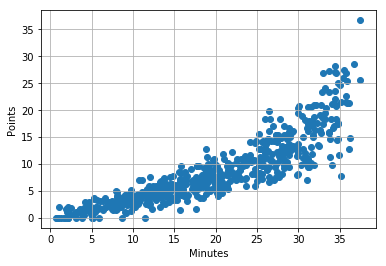

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

################################
## Load data from spreadsheet ##
################################

# Write code here

############################
## Plot data - MPG vs PPG ##
############################

# Write code here

**(c)** Implement DP-Means and apply it to the $2$D (MPG, PPG) NBA data obtained above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. Use of online code for DP-Means is prohibited; use of any Python built-in function for DP-Means is also prohibited. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations) and the number of existing clusters also stays the same.  

Current iteration:  1


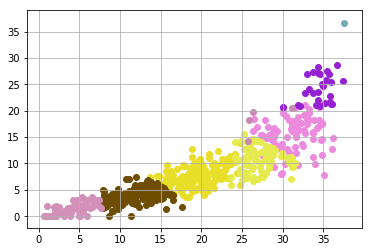

Current iteration:  2


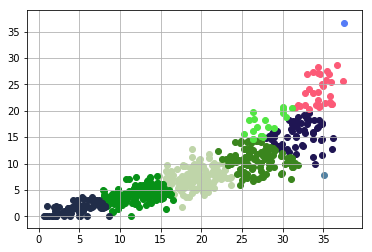

Current iteration:  3


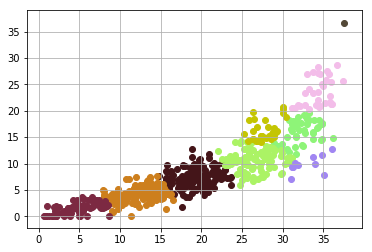

Current iteration:  4


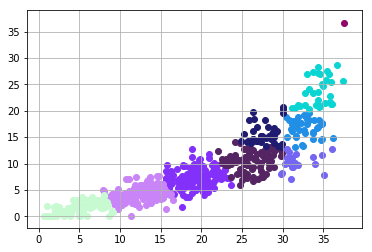

Current iteration:  5


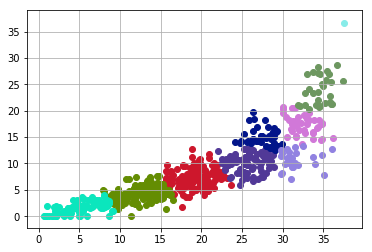

Current iteration:  6


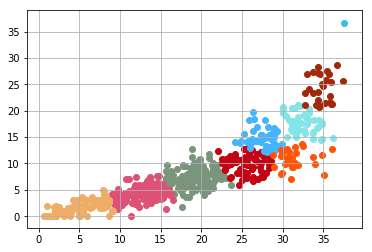

Current iteration:  7


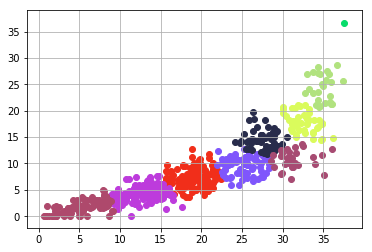

Current iteration:  8


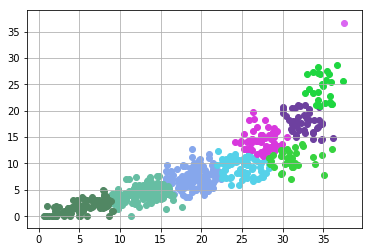

In [4]:
## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 8
convergence_threshold = 1

### DP Means - Initializations for algorithm ###
# cluster count
K = 1

# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))
################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    ## Per Data Point: ##
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        

        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:

        if ( ___ > LAMBDA):
            # make new cluster solely consisting of the new point

        else:
            # assign point to the closest cluster

        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:

    
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:

    
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:

    
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here:
    
    if (_______):
        converged = 1
    else:
        converged = 0
    ####################################################





**(d)** Run the DP-Means code created above for the following $\lambda$ values:

$\underline{\lambda} = [4,10,14,24]$.

 Plot the resulting clusters for each $\lambda$ value and discuss the results.   

In [1]:
# Plotting of results for different lambdas:

print('LAMBDA: 4','\n\n')
##############
# Lambda - 4##
##############

# Write code here

print('LAMBDA: 10','\n\n')
##############
# Lambda - 10#
##############

# Write code here

print('LAMBDA: 14','\n\n')
##############
# Lambda - 14#
##############

# Write code here

print('LAMBDA: 24','\n\n')
##############
# Lambda - 24#
##############

# Write code here



## discussion of results?

LAMBDA: 4 


LAMBDA: 10 


LAMBDA: 14 


LAMBDA: 24 


